## Import required packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

## Load and read the data

In [5]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## EDA

In [8]:
# as we have previously worked on this dataset, we would simply walk along that way
# extract the categorical features
df_not_num = df.select_dtypes('object')
df_not_num.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


In [9]:
# Now apply onehot encoding 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df_encoded = ohe.fit_transform(df_not_num)

In [11]:
df_encoded.shape

(1067, 744)

In [14]:
df_num = df.drop([key for key in df.columns.to_list() if df[key].dtype == 'object'], axis=1)
df_num.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244


In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_encoded_num = ss.fit_transform(df_num)
df_encoded_num.shape

(1067, 8)

In [57]:
import scipy
df_encoded_final = scipy.sparse.csc_matrix.toarray(df_encoded)
print(type(df_encoded_final), type(df_encoded_num))
print(df_encoded_final.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1067, 744)


In [58]:
final_data = np.concatenate((df_encoded_final, df_encoded_num), axis=1)

In [61]:
final_data.shape[0]

1067

### Creating train and test dataset via mask method

In [62]:
mask = np.random.rand(final_data.shape[0]) < 0.8
train = final_data[mask]
test = final_data[~mask]

In [63]:
print(train.shape, test.shape)

(839, 752) (228, 752)


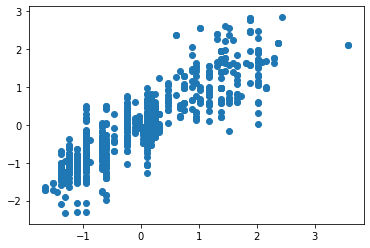

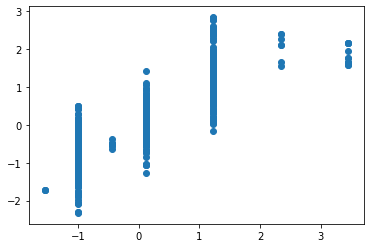

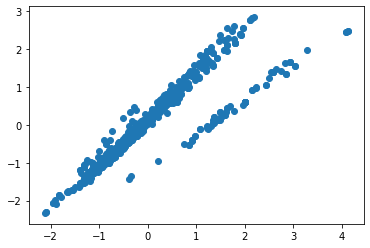

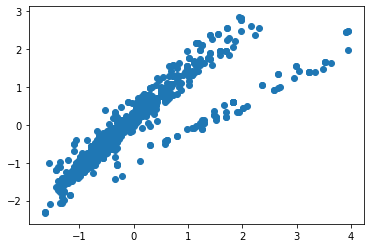

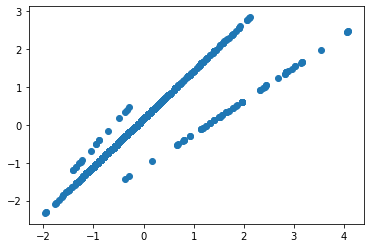

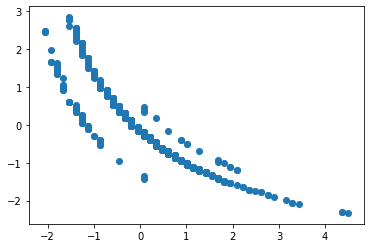

In [69]:
for i in range(745, 751):
    plt.figure()
    plt.scatter(train[:, i], train[:, -1])
    plt.show()

In [71]:
# as we can see from here, FUEL_CONSUMPTION_COMB is non_linear data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_f1 = poly.fit_transform(train[:, 750].reshape(-1, 1))
train_f1.shape

(839, 3)

In [73]:
clf = LinearRegression()
clf.fit(train_f1, train[:, -1].reshape(-1, 1))
print(clf.coef_, clf.intercept_)

[[ 0.         -0.96808122  0.10983717]] [-0.11653515]


In [84]:
test_f1 = poly.fit_transform(test[:, 750].reshape(-1, 1))
y_pred = clf.predict(test_f1)
from sklearn.metrics import mean_squared_error

print(mean_squared_error(test[:, -1].reshape(-1, 1), y_pred))

0.16019550433095625
